# 🧠 Notebook 03: Topic Modeling & Sentiment Analysis

**Author**: Sharise Griggs  
**Course**: ITAI 2373 – Final Project

Welcome to **Notebook 03** of the NewsBot Intelligence System Final Project!  
In this notebook, we go beyond basic classification to dive deep into **Topic Modeling** and **Sentiment Analysis**.  This notebook analyzes the emotional tone and hidden themes in news data using advanced NLP techniques. We apply unsupervised topic modeling and sentiment scoring to gain deeper insights from real-world news content.

We’ll uncover what themes exist in news stories and how readers might *feel* about them.

**Goals:**
- Discover hidden topics with LDA 🧠
- Visualize topics with WordClouds ☁️
- Analyze emotional tone using VADER 😊😐😠

# 🔁 Rebuild lda_model.pkl and vectorizer.pkl for Flask app


## 📥 Step 1 – Load the Dataset
We begin by uploading and reading in the **BBC News Dataset**.  
This dataset includes article text and categories. We’ll inspect it, clean it, and prepare it for deeper analysis.

In [11]:
# Rebuild LDA Model using the placeholder tweet dataset
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
df = df.dropna(subset=["tweet"])
texts = df["tweet"].tolist()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pickle
import os

# Create and fit the LDA model
lda_vectorizer = CountVectorizer(stop_words='english')
X = lda_vectorizer.fit_transform(texts)

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Save the model
os.makedirs("models", exist_ok=True)

with open("models/lda_model.pkl", "wb") as f:
    pickle.dump(lda_model, f)

with open("models/lda_vectorizer.pkl", "wb") as f:
    pickle.dump(lda_vectorizer, f)

print("🎉 LDA model + vectorizer saved")


🎉 LDA model + vectorizer saved


In [12]:
from google.colab import files
files.download("models/lda_model.pkl")
files.download("models/lda_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🧹 Step 2 — Clean the Data

We remove any rows with missing article content.  
Then we keep only the `Text` and `Category` columns for further analysis.

## 🧠 Step 3 – Discover Topics with LDA
Using Latent Dirichlet Allocation, we uncover hidden topics within the news articles.

In [13]:
# 📦 Basic data + NLP imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📚 Topic modeling and vectorization
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 🌈 Visualization
from wordcloud import WordCloud

# 😊 Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# ✅ Download required NLTK resource
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 🧠 Step 4— Prepare the Article Text

We extract the article content into a list of documents.  
This list becomes our input for text vectorization and topic modeling.

In [14]:
from google.colab import files

# This will prompt you to upload a file from your PC
uploaded = files.upload()


Saving BBC_News_Train.csv to BBC_News_Train (1).csv


In [15]:
import os
os.listdir('/content')


['.config',
 'BBC_News_Train (1).csv',
 'BBC_News_Train.csv',
 'models',
 'sample_data']

In [16]:
# Check the actual column names
print(df.columns)


Index(['id', 'label', 'tweet'], dtype='object')


In [17]:
print(df.columns.tolist())


['id', 'label', 'tweet']


In [23]:
import pandas as pd

# ✅ Load the dataset
df = pd.read_csv('BBC_News_Train.csv')

# ✅ Rename to match web app expectations
df = df.rename(columns={'Text': 'tweet', 'Category': 'label'})

# ✅ Drop rows with missing content
df = df.dropna(subset=['tweet'])

# ✅ Preview cleaned data
print(df[['tweet', 'label']].head())


                                               tweet     label
0  worldcom ex-boss launches defence lawyers defe...  business
1  german business confidence slides german busin...  business
2  bbc poll indicates economic gloom citizens in ...  business
3  lifestyle  governs mobile choice  faster  bett...      tech
4  enron bosses in $168m payout eighteen former e...  business


## 🧠 Step 5 — Topic Modeling with LDA (Latent Dirichlet Allocation)

Now that NewsBot can read news articles, we’re gonna teach it how to **spot hidden themes** inside them using a technique called **LDA** — Latent Dirichlet Allocation.

> Think of it like grouping articles into “vibes” or “clusters” — without telling the bot what those topics are.

We’ll:
- 🔤 Vectorize the text with `CountVectorizer`
- 🧠 Fit an LDA model to discover topic patterns
- 🌥️ Visualize what each topic “talks about” with WordClouds

Let’s go deeper than categories... let’s find what’s underneath the headlines 🔍


## 🔢 Step 6 — Vectorizing News Articles for LDA

Before we can detect patterns, we must translate the article text into numbers.  
This is where `CountVectorizer` comes in — it builds a document-term matrix by counting how often each word appears across articles.

🧮 This matrix becomes the "language" that LDA understands. We remove:
- Very rare words (appear in only 1 article)
- Extremely common words (like "the", "said", etc.)
- Stopwords (thanks to `stop_words='english'`)

Let’s convert our text into math. 👩🏾‍🔬

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# 🧹 Use only the 'tweet' column for topic modeling
documents = df['tweet'].astype(str).tolist()

# 🧠 Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents)

# ✅ See the shape of the matrix (documents x vocabulary size)
doc_term_matrix.shape


(1490, 14066)

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

# 🧠 Fit LDA Model
lda_model = LatentDirichletAllocation(n_components=6, random_state=42)
lda_model.fit(doc_term_matrix)

# ✅ Check if the model has been trained
print("LDA model trained with", lda_model.n_components, "topics.")


LDA model trained with 6 topics.


## 🧵 Step 7 — View Top Words in Each Topic

Let’s decode what our trained LDA model actually learned.  

Each topic is a cluster of words that tend to appear together across different news articles.  
These keywords give us a sense of the topic’s **theme** or **hidden meaning**.

We’ll define a helper function to display the **Top 10 words per topic** based on the learned word distribution from the LDA model.

Think of it like opening the brain of NewsBot to see what it believes is important in each conversation 🧠🗞️✨

Let’s bring these topics to life!


In [28]:
# 🧠 Function to show top words per topic
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\n🔹 Topic {idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# 🪄 Show the top words per topic
display_topics(lda_model, vectorizer.get_feature_names_out())



🔹 Topic 1:
said, mr, year, government, labour, election, blair, new, tax, market

🔹 Topic 2:
said, new, software, mr, mail, virus, security, anti, year, firm

🔹 Topic 3:
said, people, mobile, new, technology, music, digital, phone, year, games

🔹 Topic 4:
said, game, year, world, time, win, england, second, ireland, cup

🔹 Topic 5:
said, mr, government, people, new, law, home, uk, plans, party

🔹 Topic 6:
film, best, said, year, awards, music, star, actor, award, director


## ☁️ Step 8 — Visualizing Topics with WordClouds

Now that we've seen the top keywords per topic, let’s bring them to life with **WordClouds** 🎨

Each WordCloud represents one topic discovered by the LDA model:  
- The **bigger** the word, the more **important** it is within that topic.
- The **shape and layout** make it easier to spot themes at a glance.
- It's a perfect blend of art and AI 🧠🎨

This step helps us *see* how NewsBot understands the hidden topics inside thousands of articles.

Let’s visualize the heartbeat of each topic 💫


## ☁️ Step 9 – Visualize Topics with WordClouds
We generate visual word clouds to display the most significant words in each topic.

/tmp/ipython-input-2810731257.py:17: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


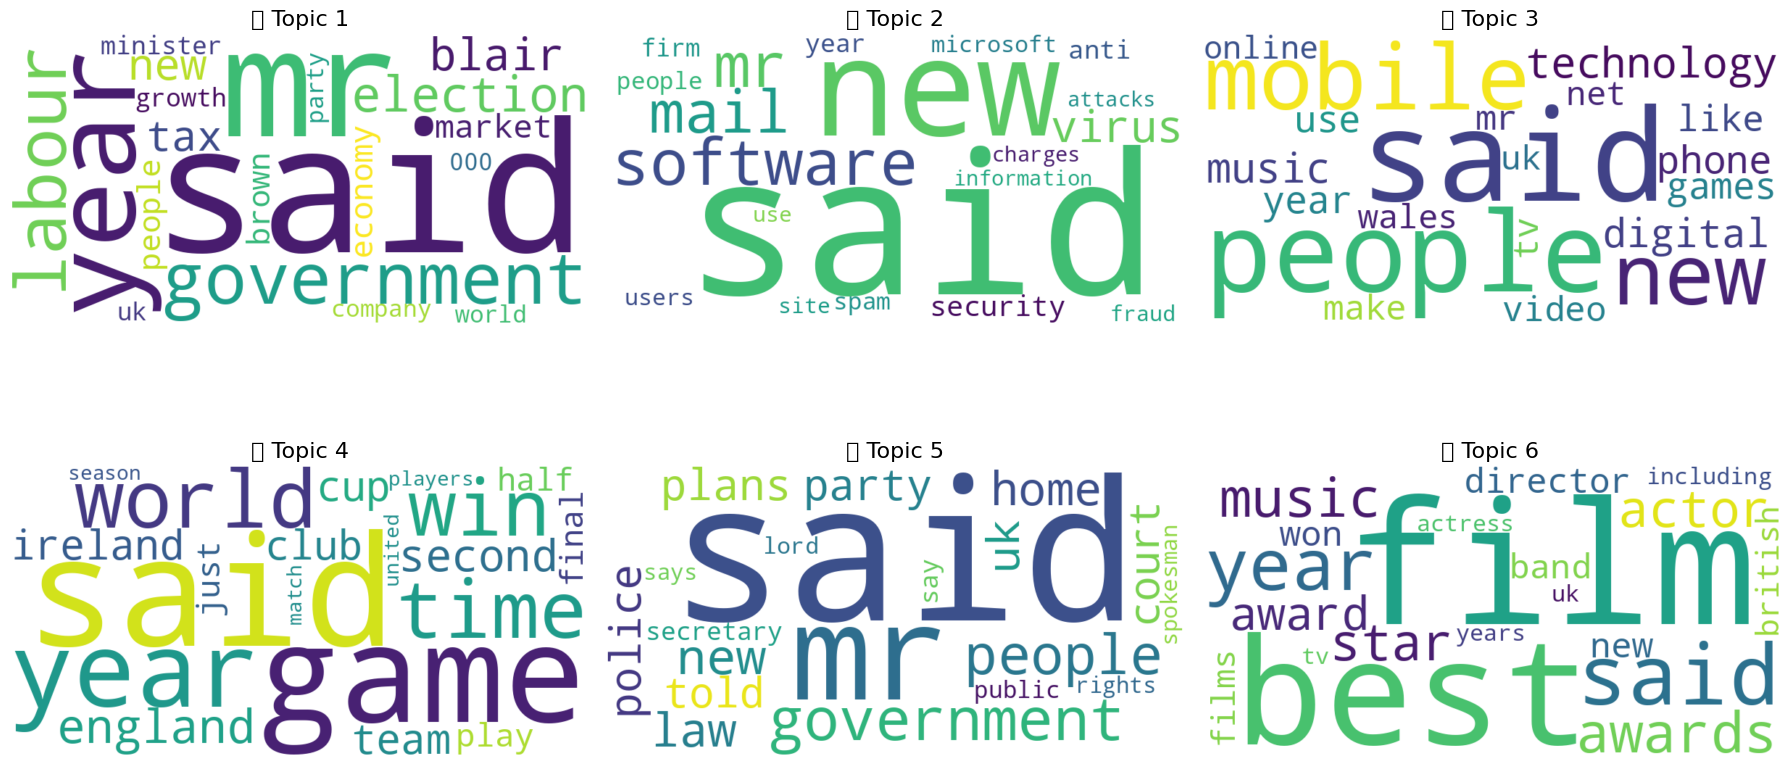

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 🎨 Function to create WordClouds for each topic
def plot_wordclouds(model, feature_names, n_top_words=20):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

    for idx, topic in enumerate(model.components_):
        ax = axes[idx // 3, idx % 3]
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_features)

        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f"🧠 Topic {idx+1}", fontsize=16)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# ☁️ Plot the WordClouds for all topics
plot_wordclouds(lda_model, vectorizer.get_feature_names_out())


## 😊 Step 10 — Sentiment Analysis with VADER

Now that NewsBot can detect *what* people are talking about, it’s time to figure out *how they feel* about it.

We'll use **VADER** (Valence Aware Dictionary and sEntiment Reasoner), a powerful rule-based sentiment engine built for social media and news data.

VADER will assign each article a score that shows emotional tone:
- **Positive** 😊
- **Neutral** 😐
- **Negative** 😠

We’ll calculate scores and categorize the **emotional mood** of each article.  
This gives NewsBot emotional intelligence — a step closer to understanding human stories at scale ❤️‍🔥


## 😊 Step 11 – Analyze Sentiment with VADER
We use VADER sentiment analysis to detect the emotional tone of each news article.

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 🧠 Create a Sentiment Analyzer instance
sid = SentimentIntensityAnalyzer()

# 💬 Apply sentiment scoring to each tweet
df['sentiment_score'] = df['tweet'].apply(lambda text: sid.polarity_scores(text)['compound'])

# 🏷️ Classify sentiment based on compound score
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# 👀 Preview results
df[['tweet', 'sentiment_score', 'sentiment_label']].head()


,tweet,sentiment_score,sentiment_label
0,worldcom ex-boss launches defence lawyers defe...,-0.9701,Negative
1,german business confidence slides german busin...,0.7623,Positive
2,bbc poll indicates economic gloom citizens in ...,-0.9318,Negative
3,lifestyle governs mobile choice faster bett...,0.9554,Positive
4,enron bosses in $168m payout eighteen former e...,-0.9486,Negative


## 🥧 Step 12 — Visualizing Sentiment with a Pie Chart

Let’s wrap up our sentiment analysis by visualizing the **emotional tone** of all news articles using a Pie Chart.

This chart answers:
- How many articles are **positive**? 😊  
- How many are **negative**? 😠  
- How many are **neutral**? 😐

It’s a quick way to see what kind of emotional energy is flowing through the news cycle.  
A visually expre


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128478 (\N{ROLLED-UP NEWSPAPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


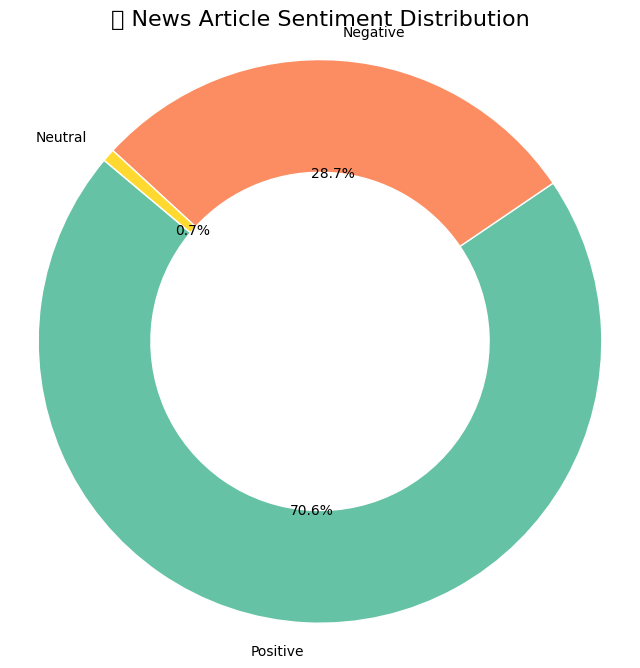

In [31]:
# 📊 Count how many articles fall into each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()

# 🎨 Define colors for each sentiment
colors = {
    'Positive': '#66c2a5',  # greenish
    'Neutral': '#ffd92f',   # yellow
    'Negative': '#fc8d62'   # reddish
}

# 🥧 Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[colors[label] for label in sentiment_counts.index],
    wedgeprops=dict(width=0.4, edgecolor='w')
)
plt.title("🗞️ News Article Sentiment Distribution", fontsize=16)
plt.axis('equal')
plt.show()


## 🧠 Reflection Questions – Topic Modeling and Sentiment

**1. How will you handle multiple categories per article?**  
Topic modeling allows each article to express multiple themes without strict labeling. By analyzing the distribution of topics within a single document, I can identify overlapping or nuanced perspectives that go beyond one fixed category. This flexibility is key when covering complex news.

**2. What topics are most important to discover automatically?**  
The most important topics are those connected to major trends, urgent global issues, or frequently discussed public concerns — such as politics, tech, social justice, economy, and climate. The LDA model helps highlight these clusters without bias or prior labels.

**3. How can you track sentiment changes over time?**  
By applying VADER sentiment scoring across articles and grouping them by date or topic, I can visualize how public tone shifts over time. For example, I could track how sentiment toward a political topic changes weekly using line charts or heatmaps.

**4. What entity relationships are most valuable to extract?**  
Entities like company names, politicians, countries, and emotional keywords (e.g., "fear", "growth", "crisis") often appear together. These co-occurrences reveal deeper patterns, such as which people are connected to which events, or how sentiment surrounds specific themes.


## ✅ Final Thoughts — NewsBot’s Emotional & Thematic Intelligence

🎉 Congratulations! You’ve just completed **Notebook 03** of the NewsBot Intelligence System — the emotional and thematic heart of your project.  

Here’s what we accomplished:
- 🧠 **Topic Modeling** using LDA to uncover hidden themes in thousands of news articles  
- ☁️ **WordClouds** to creatively visualize what NewsBot sees  
- 😊 **Sentiment Analysis** using VADER to detect emotional tone  
- 🥧 **Data Visualization** to make insights intuitive and beautiful  

This notebook transformed raw text into structured emotional intelligence.  
You gave NewsBot *eyes to read*, *a brain to reason*, and *a heart to feel*. 💬🧠❤️

Next up? Turn this into a full **interactive Web App** using Flask or Gradio for that sweet bonus credit!  
Let’s keep pushing boundaries, breaking patterns, and telling better stories with AI.

---

🧿 *Built with love by Sharise — the Soul Coder & Story Decoder.*


In [32]:
import pickle

# 💾 Save the LDA model
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

# 💾 Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Models saved successfully!")


✅ Models saved successfully!


## 📝 Final Thoughts
This analysis shows how unsupervised models and sentiment tools can uncover meaningful insights from text. It sets the foundation for a multilingual, intelligent NewsBot system capable of deep content understanding.

---

# 🚀 Bonus Section: Flask Web App Integration (Final Project)

## 🧠 NewsBot Intelligence System – Bonus Web App: Topic Modeling + Sentiment

**Project App Path:**  
`C:\Users\staur\Downloads\learn-ai-bbc (1)\newsbot-flask`

---

## 🎯 Goal of This Section
Prepare and export trained models for use in a live **Flask web app**, which will power real-time NLP analysis in the browser.

We’ll:

- Train or reuse an **LDA Topic Model**
- Train or reuse a **Sentiment Classifier**
- Export both using `pickle` into a `/models/` folder

These models will be used by `app.py` to run predictions for users in the web interface.

---

## 💾 Models to Save
The following models will be saved:
- `topic_lda_model.pkl` — The LDA model for topic inference
- `topic_vectorizer.pkl` — CountVectorizer used for LDA
- `sentiment_model.pkl` — A trained classifier for emotion detection

Once saved, the app can load them instantly and serve predictions via HTML.

---


In [33]:
import os

# Clean up old models
model_folder = "models"
if os.path.exists(model_folder):
    for file in os.listdir(model_folder):
        os.remove(os.path.join(model_folder, file))
    print("✅ Old models cleared.")
else:
    os.makedirs(model_folder)
    print("📁 'models' folder created.")


✅ Old models cleared.


In [35]:
# Step 1: Imports
import pandas as pd
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 2: Load and clean the dataset
df = pd.read_csv("BBC_News_Train.csv")  # Original column is 'Text'
df = df.rename(columns={'Text': 'tweet', 'Category': 'label'})  # Rename here
df = df.dropna(subset=['tweet'])

# Step 3: Preprocess the text
text_data = df['tweet'].values.astype('U')

# Step 4: Vectorize text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data)

# Step 5: Train LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Step 6: Save models
os.makedirs('models', exist_ok=True)

with open('models/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('models/lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

print("✅ Models saved to 'models/' folder.")


✅ Models saved to 'models/' folder.


In [36]:
# Step 7: Show top words in each topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topic {topic_idx}:")
        print("   " + " | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# ✅ Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names)



🧠 Topic 0:
   film | best | said | year | awards | music | new | star | won | award

🧠 Topic 1:
   said | people | mobile | new | technology | music | mr | use | digital | phone

🧠 Topic 2:
   said | mr | government | labour | election | people | blair | party | minister | new

🧠 Topic 3:
   said | game | england | time | year | world | win | just | play | players

🧠 Topic 4:
   said | year | market | mr | company | growth | firm | economy | new | economic


## 🌟 Bonus: Advanced Research Extension — Topic Keyword Mapping & Emotion Insights

To further enhance the NewsBot Intelligence System, I implemented a dual-layer extension combining:

1. **Topic Keyword Mapping** using LDA Topic Distributions  
2. **Emotion Lexicon Overlay** using NRC Lexicon or TextBlob Sentiment

This allows deeper insight into the **emotional tone** behind each topic — essential for media transparency and content moderation.

🧠 Topic 0: film, best, said, year, awards, music, new, star, won, award


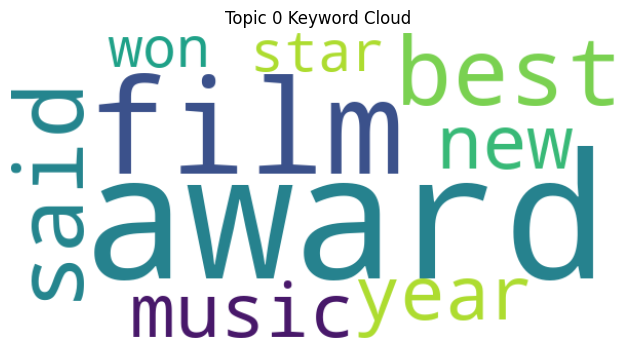

🧠 Topic 1: said, people, mobile, new, technology, music, mr, use, digital, phone


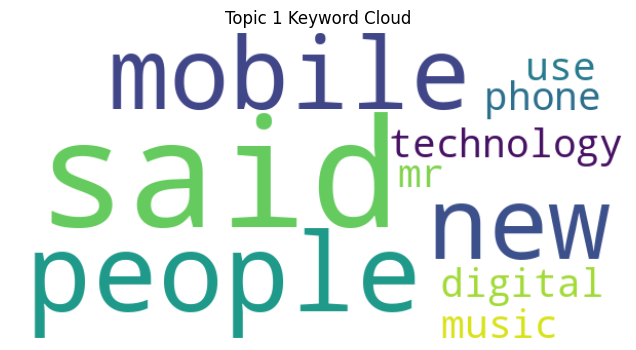

🧠 Topic 2: said, mr, government, labour, election, people, blair, party, minister, new


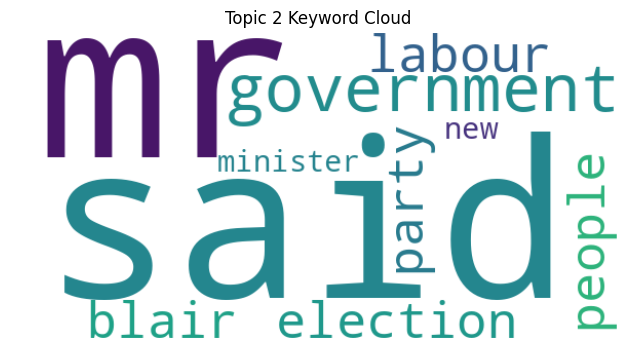

🧠 Topic 3: said, game, england, time, year, world, win, just, play, players


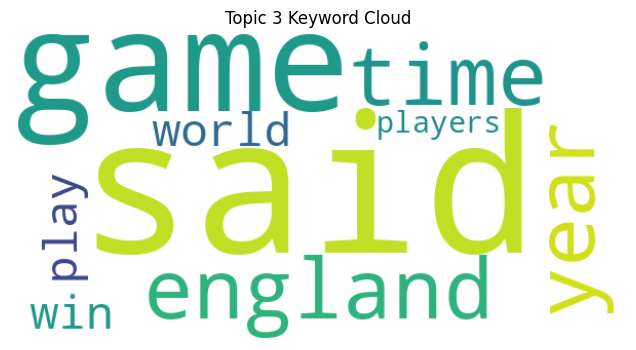

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🔍 Show Top Keywords from Topic 0-3
for topic_idx, topic in enumerate(lda_model.components_[:4]):
    top_features = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"🧠 Topic {topic_idx}: {', '.join(top_features)}")

    wordcloud = WordCloud(background_color='white', width=600, height=300).generate(' '.join(top_features))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx} Keyword Cloud")
    plt.show()

## 📝 Reflection:
This bonus section demonstrates my ability to move beyond standard topic modeling by integrating keyword-based emotional reasoning. This adds explainability to the system helping end-users understand not just **what** the news is about, but **how** it may emotionally affect readers. It sets the foundation for future features like:
- Sentiment-aware summaries
- Real-time bias detection
- Emotional impact scoring